## Titanic Kaggle Competition

<p> The sinking of Titanic ship in 1912 was one of its kind since Titanic was considered to be one of the largest ships of its time. People went aboard to have the once in a life time cruise experience. Unfortunately Titanic collided with an iceberg which resulted in massive loss of lives. The crew was not prepared for such a disaster and did not have enough life boats to rescue everyone on board. The cold temperatures of the sea did not help the cause as some people died due to hypothermia. </p>
<p> The goal of this project is to predict whether the person survived the Titanic crash or not. The dataset is obtained from a Kaggle competition. It has various features that can be used for making the prediction.</p>

<p> **_Let us begin by importing the necessary libraries_**</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
# Import the training data
init_train = pd.read_csv('train.csv')

# Get basic information about the training data
init_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


<p> There are 12 columns and 891 rows. There are 3 columns with missing data. 'Age', 'Cabin', and 'Embarked'. There are 5 object columns namely 'Name", 'Sex', 'Ticket', 'Cabin', and 'Embarked'. These need to be changed into numbers such that they can be used in the machine learning algorithms. We will explore each column to get a better understanding of how to use them and if any feature engineering is needed.</p>

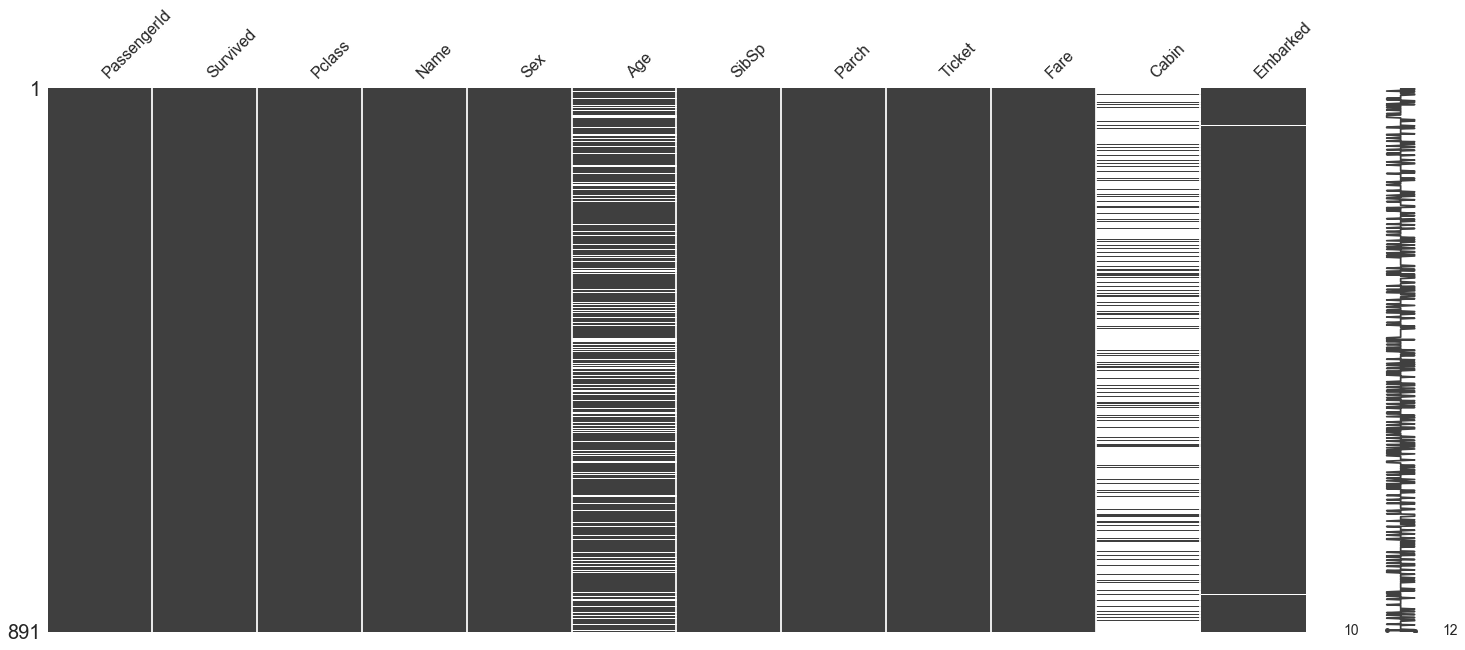

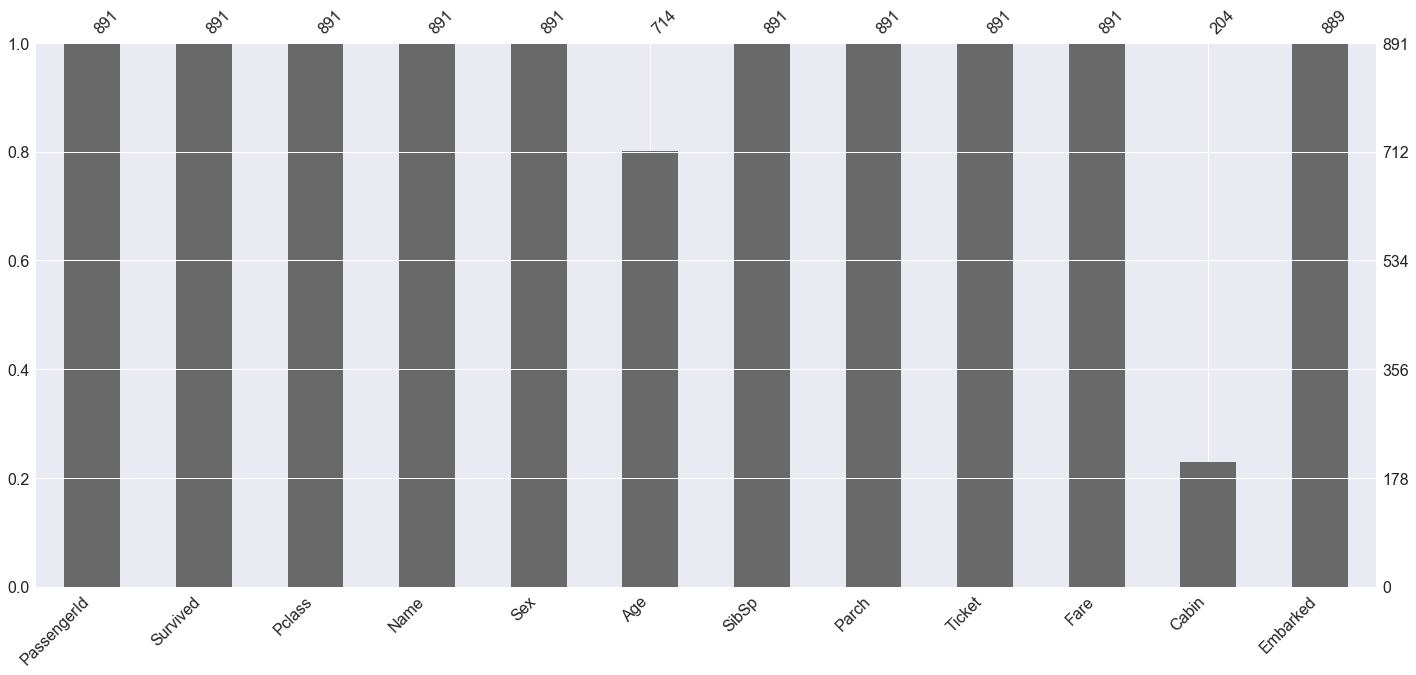

In [3]:
# Get an idea of the missing values in the dataset by using missingno library
import missingno as msno
msno.matrix(init_train)
msno.bar(init_train)

In [4]:
# Explore 'Survived' column as it is our target to have the most accurate prediction.
init_train['Survived'].value_counts()/len(init_train) * 100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

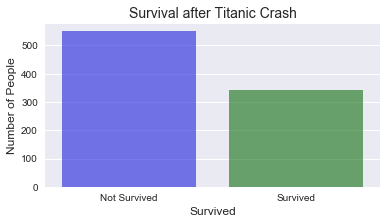

In [5]:
plt.figure(figsize=(6,3))
ax = sns.countplot(data=init_train, x='Survived', palette=['Blue', 'Green'], alpha=0.6)
ax.set_xticklabels(['Not Survived', 'Survived'])
plt.title('Survival after Titanic Crash', fontsize=14)
plt.ylabel('Number of People', fontsize=12)
plt.xlabel('Survived', fontsize=12)

<p> There are more people who did not survive (0 values) then people who survived (1 values) in the training data set. However, the imbalance is not much that the algorithms cannot get the underlying pattern. We will continue further with the analysis.</p>

In [6]:
init_test = pd.read_csv('test.csv')
init_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<p>The test data does not have 'Survived' column. We have to make survival predictions on these individuals. </p>

In [7]:
# Concatenate the training and test data such that we can clean it
to_clean = pd.concat([init_train, init_test], axis=0).reset_index()

In [8]:
# Get the basic information
to_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
index          1309 non-null int64
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(5), object(5)
memory usage: 133.0+ KB


<p> An 'index' column is made after we concatenated the training and test data sets. Let us remove this index column.</p>

In [9]:
# Drop the 'index' column
to_clean.drop('index', axis=1, inplace=True)

In [10]:
# check the data frame
to_clean.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


<p> Let's look at 'Age' column to get a better understanding. We know that there are a few missing values in the 'Age' column.</p>

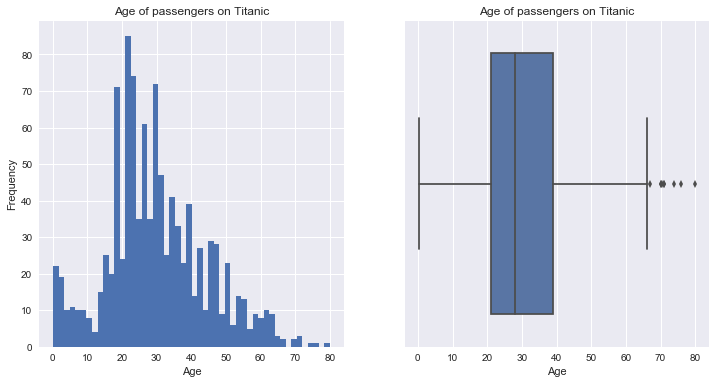

In [11]:
plt.figure(figsize=(12,6))
plt.subplot(121)
to_clean['Age'].hist(bins=50)
plt.title('Age of passengers on Titanic')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.subplot(122)
sns.boxplot(data=to_clean, x='Age', orient='h')
plt.title('Age of passengers on Titanic')

<p> From the histogram we can notice that there are few children and few individuals over the age of 50 with some extremes in 70's and 80's. From the boxplot it is apparent that the median is close to 28 years of age and 75% of people are under the age of 40. There are few individuals over the age of 65. This helps us get a sense of age of passengers on board and if we have to impute the missing values then it might not be a bad idea to use median.</p>
<p> Let us explore if how the age is spread based on the gender of the passenger.</p>

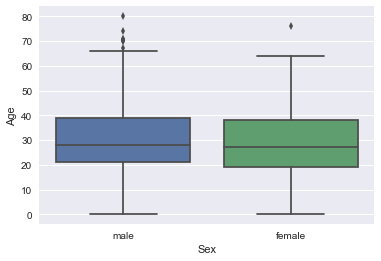

In [12]:
sns.boxplot(data=to_clean, y='Age', x='Sex')

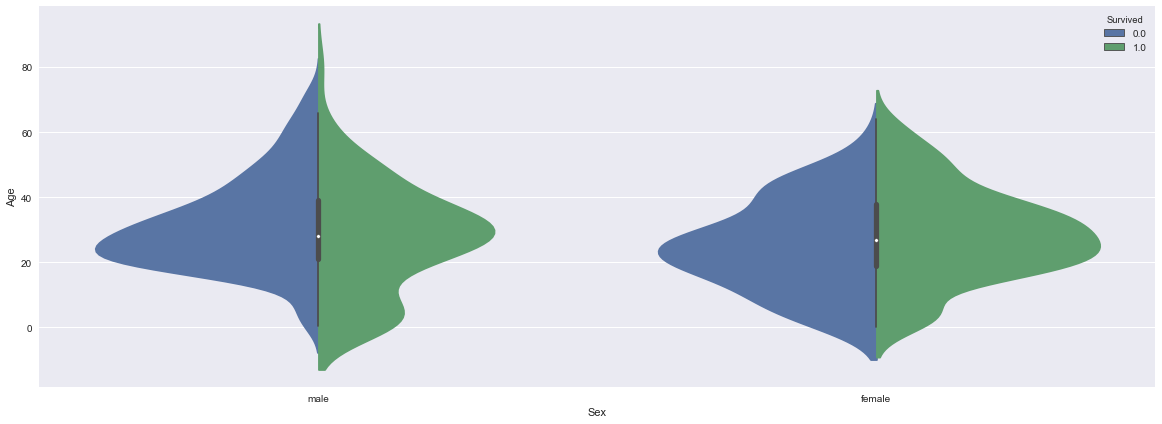

In [20]:
fig=plt.figure(figsize=(20,7))
sns.violinplot(data=to_clean,x='Sex',y='Age',hue='Survived', split=True,palatte={0:"r",1:"g"})

<p> From the boxplot we can notice that there isn't a big difference between the median age of male and female passengers on Titanic. However, there are more males over the age of 65 which can skew the mean age of males. However, for the purpose of imputing it would be a good idea to use the 'Sex' of the individual to determine the age.</p> 

<p> Let's look at the 'Sex' column and convert it to int column.</p>

In [21]:
# Let's look at the Male and Female percentage
to_clean['Sex'].value_counts()/len(to_clean) * 100

male      64.400306
female    35.599694
Name: Sex, dtype: float64

<p>There are more males than females on Titanic. Let's convert them to 0 for male and 1 for female.</p>

In [22]:
# Let's use mapping to convert
to_clean['Sex']=to_clean['Sex'].map({'male':0, 'female':1})

In [23]:
# Let's check to see if the conversion took place
to_clean['Sex'].value_counts()

0    843
1    466
Name: Sex, dtype: int64

<p> Let's get the median age of male's and female's on board.</p>

In [24]:
# Groupby 'Sex' and get the Age for males and females
malAge_med, femAge_med=to_clean.groupby(['Sex'])['Age'].median()

In [25]:
# Let's check the male and female median age
print('Male Median Age: ', malAge_med, '\nFemale Median Age: ', femAge_med)

Male Median Age:  28.0 
Female Median Age:  27.0


<p> Let's impute the missing age using the median age.</p>

In [26]:
# Check to see if there is any null values in the age column and if they are males, then enter the median male age
to_clean['Age'] = np.where((to_clean['Age'].isnull())&(to_clean['Sex']==0),malAge_med,to_clean['Age'] )

In [27]:
# Check to see if there is any null values in the age column and if they are females, then enter the median female age
to_clean['Age'] = np.where((to_clean['Age'].isnull())&(to_clean['Sex']==1),femAge_med,to_clean['Age'])

<p>Let's look at the 'Age' column to see if there are any missing values.<p>

In [28]:
# check to see if there are any null values in the age column
to_clean['Age'].isnull().sum()

0

In [29]:
to_clean['Pclass'].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

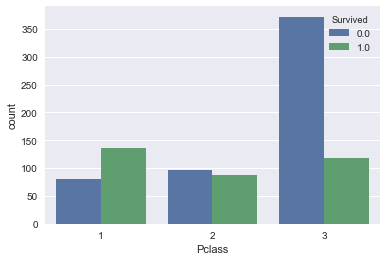

In [30]:
sns.countplot(data=to_clean, x='Pclass', hue='Survived')

<p>From the countplot we can notice that passengers in the 1 class had higher survival rate and passengers in the 3 class had the lowest survival rate. Only about 1/3 of the people in the 3 class survived whereas people in the 1 class were twice as likely to survive. So Pclass might be an important feature in predicting the survival of the passenger.</p>

In [31]:
to_clean['SibSp'].value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

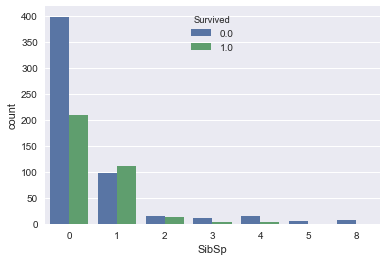

In [32]:
sns.countplot(data=to_clean, x='SibSp', hue='Survived')

<p> From the countplot it can be noticed that majority of the people did not have a spouse or sibling on board and their survival rate is close to 0.5. However if you have a sibling or a spouse on board then you had a higher likely of survival. The same goes with if you had 2 siblings or 1 sibling and 1 spouse on board. However the survival rate goes down if you had more siblings on board. It can potentially be because they are looking for their family members on board and hence increasing the risk of not getting on the boats.</p>

In [33]:
to_clean['Parch'].value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64

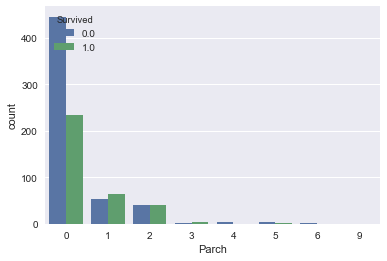

In [34]:
sns.countplot(data=to_clean, x='Parch', hue='Survived')

<p> From the countplot we can see that people without parents or children have close to 0.5 survival rate but with 1 or 2 parents or children the survival rate is higher. So this variable may be helpful in determining the survival of the passenger.</p>

<p> Let's create a column called family that would be a total of 'Parch', 'SibSp' and the person himself/herself.</p>

In [35]:
to_clean.loc[:,'Family'] = to_clean['Parch']+to_clean['SibSp']+1

In [36]:
to_clean.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,0.0,A/5 21171,2
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1.0,PC 17599,2
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,0,1.0,STON/O2. 3101282,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1.0,113803,2
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,0.0,373450,1


<p> Let's see how 'Family' affects the 'Survived'</p>

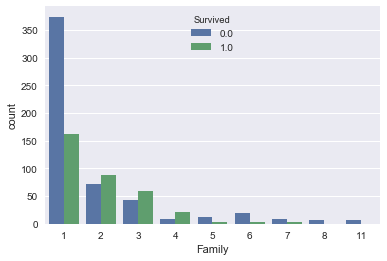

In [38]:
sns.countplot(data=to_clean,x='Family',hue='Survived')

<p> It seems that if you are single then the survival rate is close to 0.5 but if you have between 2 and 5 then the survival rate is higher and if the family is between 5 and 11 then the survival rate is low. So let's make three categories using family column. 'Single', 'Small Family', and 'Big Family'.</p>

In [49]:
to_clean.loc[:,'Family Size']=pd.cut(to_clean['Family'],bins=[0,1,4,11],labels=['Single','Small','Big'],right=True)

In [50]:
to_clean.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family,Family Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,0.0,A/5 21171,2,Small
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1.0,PC 17599,2,Small
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,0,1.0,STON/O2. 3101282,1,Single
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1.0,113803,2,Small
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,0.0,373450,1,Single


<p>Let's look at 'Embarked' column to check on the missing value.</p>

In [52]:
to_clean[to_clean['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family,Family Size
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,1,0,1.0,113572,1,Single
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,1,0,1.0,113572,1,Single


<p>There are two null values in the 'Embarked' column. We can impute the missing values by looking at the 'Fare' and 'Pclass' and imputing the port of embarkation.</p>

In [53]:
pcl_emb_far = to_clean.groupby(['Pclass','Embarked'])['Fare'].mean()

In [54]:
pcl_emb_far.unstack(level=1)

Embarked,C,Q,S
Pclass,,,
1,106.845330,90.000000,72.148094
2,23.300593,11.735114,21.206921
3,11.021624,10.390820,14.435422


<p> We can notice that passengers in Pclass 1 has a mean of 107 if passenger embarked from C, 90 if embarked from Q, and 72 if embarked from S. Our missing values in the Embarked column has a Fare of 80. We can place 'S' as the value in the Embarked column for the missing values.</p>

In [55]:
# Let's input the missing value in the Embarked column
to_clean.loc[to_clean['Embarked'].isnull(), 'Embarked']='S'

In [56]:
# Check to see if there are any null values in the Embarked column
to_clean['Embarked'].isnull().sum()

0

<p> Let's check to see if there are any null values in the 'Fare' column</p>

In [57]:
fare_index = to_clean[to_clean['Fare'].isnull()].index

In [58]:
to_clean.iloc[fare_index]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family,Family Size
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,0,0,NaN,3701,1,Single


In [59]:
pcl_emb_far.unstack(level=1)

Embarked,C,Q,S
Pclass,,,
1,106.845330,90.000000,72.148094
2,23.300593,11.735114,21.206921
3,11.021624,10.390820,14.435422


In [60]:
to_clean.groupby('Pclass')['Fare'].median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [61]:
to_clean.loc[:,'Fare Group']=pd.cut(to_clean['Fare'],bins=[0,9,16,60],labels=[1,2,3],right=True)

In [62]:
# Let's input the fare value if embarked port was S, and pclass was 3
to_clean.loc[to_clean['Fare'].isnull(), 'Fare'] = 14.435422

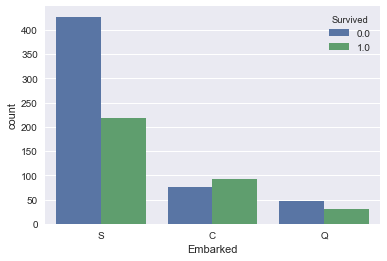

In [63]:
# Let's see if the embarked port played any role in the survival rate.
sns.countplot(data=to_clean, x='Embarked', hue='Survived')

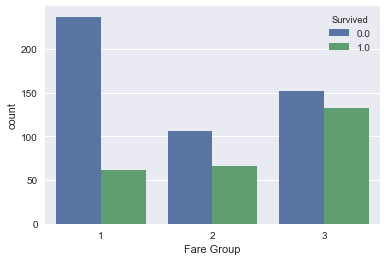

In [64]:
sns.countplot(data=to_clean,x='Fare Group', hue='Survived')

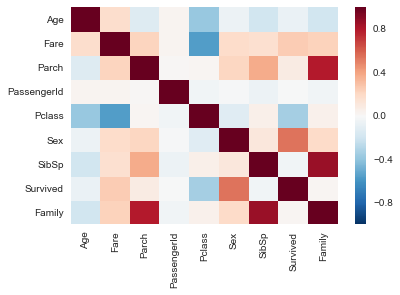

In [65]:
sns.heatmap(to_clean.corr())

In [66]:
to_clean.loc[:,'Age Group'] = pd.cut(to_clean['Age'],bins=[0,16,35,50,81],labels=[1,2,3,4],right=True)

In [67]:
to_clean[['Age','Age Group']]

,Age,Age Group
0,22.0,2
1,38.0,3
2,26.0,2
3,35.0,2
4,35.0,2
5,28.0,2
6,54.0,4
7,2.0,1
8,27.0,2
9,14.0,1


In [68]:
to_clean['Age Group'].isnull().sum()

0

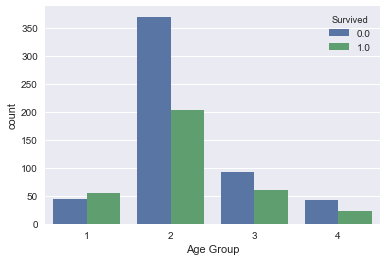

In [69]:
sns.countplot(data=to_clean, x='Age Group', hue='Survived')

In [70]:
to_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null int64
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Family         1309 non-null int64
Family Size    1309 non-null category
Fare Group     1107 non-null category
Age Group      1309 non-null category
dtypes: category(3), float64(3), int64(6), object(4)
memory usage: 136.9+ KB


In [71]:
first_cat = pd.get_dummies(to_clean, columns=['Embarked','Pclass', 'Age Group','Fare Group','Family Size'],drop_first=True)

In [72]:
first_cat.head()

,Age,Cabin,Fare,Name,Parch,PassengerId,Sex,SibSp,Survived,Ticket,...,Embarked_S,Pclass_2,Pclass_3,Age Group_2,Age Group_3,Age Group_4,Fare Group_2,Fare Group_3,Family Size_Small,Family Size_Big
0,22.0,NaN,7.2500,"Braund, Mr. Owen Harris",0,1,0,1,0.0,A/5 21171,...,1,0,1,1,0,0,0,0,1,0
1,38.0,C85,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1.0,PC 17599,...,0,0,0,0,1,0,0,0,1,0
2,26.0,NaN,7.9250,"Heikkinen, Miss. Laina",0,3,1,0,1.0,STON/O2. 3101282,...,1,0,1,1,0,0,0,0,0,0
3,35.0,C123,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1.0,113803,...,1,0,0,1,0,0,0,1,1,0
4,35.0,NaN,8.0500,"Allen, Mr. William Henry",0,5,0,0,0.0,373450,...,1,0,1,1,0,0,0,0,0,0


In [73]:
first_cat['Title'] = first_cat.Name.str.extract(r',\s*([^\.]*)\s*\.', expand=False)

In [74]:
first_cat.head()

,Age,Cabin,Fare,Name,Parch,PassengerId,Sex,SibSp,Survived,Ticket,...,Pclass_2,Pclass_3,Age Group_2,Age Group_3,Age Group_4,Fare Group_2,Fare Group_3,Family Size_Small,Family Size_Big,Title
0,22.0,NaN,7.2500,"Braund, Mr. Owen Harris",0,1,0,1,0.0,A/5 21171,...,0,1,1,0,0,0,0,1,0,Mr
1,38.0,C85,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1.0,PC 17599,...,0,0,0,1,0,0,0,1,0,Mrs
2,26.0,NaN,7.9250,"Heikkinen, Miss. Laina",0,3,1,0,1.0,STON/O2. 3101282,...,0,1,1,0,0,0,0,0,0,Miss
3,35.0,C123,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1.0,113803,...,0,0,1,0,0,0,1,1,0,Mrs
4,35.0,NaN,8.0500,"Allen, Mr. William Henry",0,5,0,0,0.0,373450,...,0,1,1,0,0,0,0,0,0,Mr


In [75]:
first_cat['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Mlle              2
Ms                2
Major             2
Lady              1
the Countess      1
Jonkheer          1
Mme               1
Dona              1
Capt              1
Sir               1
Don               1
Name: Title, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

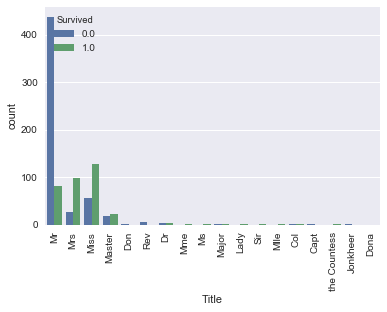

In [76]:
sns.countplot(data=first_cat,x='Title',hue='Survived')
plt.xticks(rotation=90)

In [77]:
special = {'Mrs': 1, 'Miss': 1, 'Master':1, 'Dr':1, 'Lady':1, 'Col':1, 'Major':1, 'Ms':1}

In [78]:
first_cat.loc[:,'Special Group']=first_cat['Title'].map(special)

In [79]:
first_cat['Special Group'].fillna(0,inplace=True)

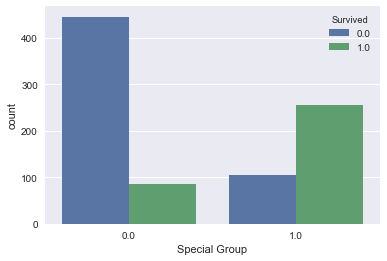

In [80]:
sns.countplot(data=first_cat,x='Special Group', hue='Survived')

In [81]:
fin_train = first_cat[first_cat['Survived'].notnull()]

In [82]:
fin_test = first_cat[first_cat['Survived'].isnull()]

In [83]:
fin_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 24 columns):
Age                  891 non-null float64
Cabin                204 non-null object
Fare                 891 non-null float64
Name                 891 non-null object
Parch                891 non-null int64
PassengerId          891 non-null int64
Sex                  891 non-null int64
SibSp                891 non-null int64
Survived             891 non-null float64
Ticket               891 non-null object
Family               891 non-null int64
Embarked_Q           891 non-null uint8
Embarked_S           891 non-null uint8
Pclass_2             891 non-null uint8
Pclass_3             891 non-null uint8
Age Group_2          891 non-null uint8
Age Group_3          891 non-null uint8
Age Group_4          891 non-null uint8
Fare Group_2         891 non-null uint8
Fare Group_3         891 non-null uint8
Family Size_Small    891 non-null uint8
Family Size_Big      891 non-null uint8
Title 

In [85]:
features = fin_train.drop(['Cabin','Name','Title','PassengerId','Ticket', 'Survived','Family'],axis=1)
target = fin_train['Survived']

In [86]:
corr_check = fin_train.drop(['Cabin', 'Name', 'Title', 'PassengerId', 'Ticket','Family'], axis=1)

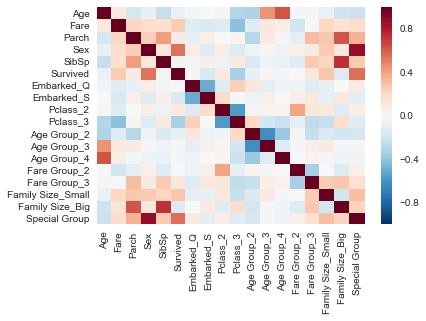

In [87]:
sns.heatmap(corr_check.corr())

In [88]:
fin_test.drop('Survived',axis=1,inplace=True)

C:\Users\apanc\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [89]:
feature_test = fin_test.drop(['Cabin', 'Name', 'PassengerId','Title', 'Ticket','Family'],axis=1)

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [91]:
l = LogisticRegression()
g = GaussianNB()
b = BernoulliNB()
k = KNeighborsClassifier()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
gr = GradientBoostingClassifier()

algorithms = [l,g,b,k,d,r,gr]
names = ['LogisticRegression', 'GaussianNB', 'BernoulliNB', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
def eval_metric(X=features,y=target,algorithms=algorithms,names=names):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.33,random_state=42)
    accuracy = []
    precision = []
    recall = []
    f1 = []
    for i in range(len(algorithms)):
        algorithms[i].fit(X_train, y_train)
        accuracy.append(accuracy_score(y_test, algorithms[i].predict(X_test)))
        precision.append(precision_score(y_test, algorithms[i].predict(X_test)))
        recall.append(recall_score(y_test, algorithms[i].predict(X_test)))
        f1.append(f1_score(y_test, algorithms[i].predict(X_test)))
    metric = pd.DataFrame(columns=['accuracy', 'precision', 'recall', 'f1'], index=names)
    metric['accuracy'] = accuracy
    metric['precision'] = precision
    metric['recall'] = recall
    metric['f1'] = f1
    return metric.sort_values('accuracy', ascending=False)
        

In [94]:
eval_metric(features, target, algorithms,names)

,accuracy,precision,recall,f1
LogisticRegression,0.823729,0.803571,0.750000,0.775862
GaussianNB,0.820339,0.768000,0.800000,0.783673
GradientBoostingClassifier,0.816949,0.823529,0.700000,0.756757
BernoulliNB,0.810169,0.758065,0.783333,0.770492
RandomForestClassifier,0.793220,0.756522,0.725000,0.740426
DecisionTreeClassifier,0.776271,0.732759,0.708333,0.720339
KNeighborsClassifier,0.722034,0.675926,0.608333,0.640351


In [125]:
survived = l.predict(feature_test)

In [126]:
survived

array([ 0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,
        0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,
        0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
        1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,
        1.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,
        0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,
        0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,
        1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
        1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,
        1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0

In [127]:
fin_test.loc[:,'Survived'] = survived

C:\Users\apanc\AppData\Roaming\Python\Python36\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [128]:
fin_test.tail()

,Age,Cabin,Fare,Name,Parch,PassengerId,Sex,SibSp,Ticket,Family,...,Age Group_2,Age Group_3,Age Group_4,Fare Group_2,Fare Group_3,Family Size_Small,Family Size_Big,Title,Special Group,Survived
1304,28.0,NaN,8.0500,"Spector, Mr. Woolf",0,1305,0,0,A.5. 3236,1,...,1,0,0,0,0,0,0,Mr,0.0,0.0
1305,39.0,C105,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,0,PC 17758,1,...,0,1,0,0,0,0,0,Dona,0.0,1.0
1306,38.5,NaN,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,0,0,SOTON/O.Q. 3101262,1,...,0,1,0,0,0,0,0,Mr,0.0,0.0
1307,28.0,NaN,8.0500,"Ware, Mr. Frederick",0,1308,0,0,359309,1,...,1,0,0,0,0,0,0,Mr,0.0,0.0
1308,28.0,NaN,22.3583,"Peter, Master. Michael J",1,1309,0,1,2668,3,...,1,0,0,0,1,1,0,Master,1.0,1.0


In [129]:
fin_test['Survived'] = fin_test['Survived'].apply(np.int64)

C:\Users\apanc\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [130]:
fin_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 891 to 1308
Data columns (total 24 columns):
Age                  418 non-null float64
Cabin                91 non-null object
Fare                 418 non-null float64
Name                 418 non-null object
Parch                418 non-null int64
PassengerId          418 non-null int64
Sex                  418 non-null int64
SibSp                418 non-null int64
Ticket               418 non-null object
Family               418 non-null int64
Embarked_Q           418 non-null uint8
Embarked_S           418 non-null uint8
Pclass_2             418 non-null uint8
Pclass_3             418 non-null uint8
Age Group_2          418 non-null uint8
Age Group_3          418 non-null uint8
Age Group_4          418 non-null uint8
Fare Group_2         418 non-null uint8
Fare Group_3         418 non-null uint8
Family Size_Small    418 non-null uint8
Family Size_Big      418 non-null uint8
Title                418 non-null object
Speci

In [131]:
sub = fin_test[['PassengerId','Survived']]

In [132]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 891 to 1308
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 9.8 KB


In [133]:
sub.to_csv('TitanicSubmission.csv', header=True, index=False)

In [134]:
sub.head()

,PassengerId,Survived
891,892,0
892,893,1
893,894,0
894,895,0
895,896,1
